## OpenCV中的GUI相关操作

- 读入图像，视频文件，摄像头
- 显示图像，播放视频文件，播放摄像头
- 保存图像，保存视频文件

cv2.imread()，cv2.imshow()，cv2.imwrite()

cv2.VideoCapture()，cv2.VideoWrite()

### 2.1 读取，显示，保存图像

In [7]:
import numpy as np
import cv2

img = cv2.imread('len_std.jpg',0)
cv2.imshow('image', img)

k = cv2.waitKey(0) & 0xFF

if k == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png', img)

cv2.destroyAllWindows()

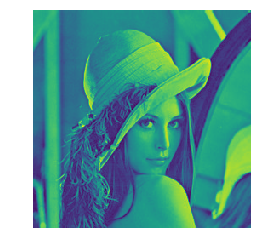

In [8]:
#也可以使用matplotlib显示图像

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('len_std.jpg',0)
plt.imshow(img)
plt.axis('off')
plt.show()

# 为什么颜色不对呢？

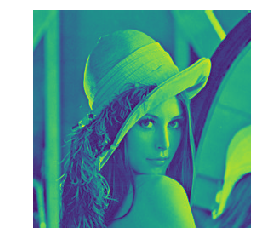

In [9]:
#彩色图像使用 OpenCV 加载时是 BGR 模式。但是 Matplotib 是 RGB模式。所以彩色图像如果已经被 OpenCV 读取，那它将不会被 Matplotib 正确显示。这时候需要对通道的顺序进行调整。

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('len_std.jpg',0)

tmp = img[0]
img[0] = img[2]
img[2] = tmp

plt.imshow(img)
plt.axis('off')
plt.show()


### 2.2 摄像头图像获取和显示

VideoCapture 是 opencv 中封装的一个视频/摄像头操作的对象。他的参数可以是
设备的索引号，也可以是一个视频文件。设备索引号就是指定要使用的摄像头的ID。
一般的笔记本电脑都有内置摄像头, 那么这个摄像头的ID就是 0。也可以通过设置成 1 或
者其他的来选择别的摄像头。

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

### 2.3 视频保存

关于读取摄像头，并且将获取图像写到视频文件中，可以使用如下的方法：

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.flip(frame,0)
        # write the flipped frame
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()